In [43]:
DATA_FILE       = '../data/nasa.p'
PREFIX          = 'nasa/nasa_w2v_'

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import time
from datetime import datetime as dt
import json
import pickle
import random
from os.path import join
from pathlib import Path
import logging

from cleaning.serialize import struct2sentence
from analysis.diriter import DirectorySentenceIterator
import stdlog
from gensim.models.word2vec import Word2Vec

2018-05-08 22:12:03,358 : INFO : 'pattern' package not found; tag filters are not available for English


In [4]:
# Load pickled dataset in entirety
long_names, metadata = pickle.load(open(DATA_FILE, 'rb'))

In [26]:
import multiprocessing

# Parallelize serialization of data into sentences
pool = multiprocessing.Pool()
sentences_2d = pool.map(struct2sentence, metadata)
sentences = [list(filter(None, item.split(' '))) for sublist in sentences_2d for item in sublist]

In [27]:
# Create and train a new model
model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=7)

2018-05-08 16:00:32,194 : INFO : collecting all words and their counts
2018-05-08 16:00:32,195 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-08 16:00:32,220 : INFO : PROGRESS: at sentence #10000, processed 81182 words, keeping 4421 word types
2018-05-08 16:00:32,245 : INFO : PROGRESS: at sentence #20000, processed 167233 words, keeping 6483 word types
2018-05-08 16:00:32,266 : INFO : PROGRESS: at sentence #30000, processed 246946 words, keeping 8344 word types
2018-05-08 16:00:32,289 : INFO : PROGRESS: at sentence #40000, processed 336871 words, keeping 8925 word types
2018-05-08 16:00:32,310 : INFO : PROGRESS: at sentence #50000, processed 417503 words, keeping 10728 word types
2018-05-08 16:00:32,334 : INFO : PROGRESS: at sentence #60000, processed 509774 words, keeping 12750 word types
2018-05-08 16:00:32,359 : INFO : PROGRESS: at sentence #70000, processed 600283 words, keeping 14041 word types
2018-05-08 16:00:32,387 : INFO : PROGRESS: at sente

In [32]:
#model.save(PREFIX + 'basic.m')
model = Word2Vec.load(PREFIX + 'basic.m')

2018-05-08 16:02:52,888 : INFO : loading Word2Vec object from word2vec_structured.m
2018-05-08 16:02:52,966 : INFO : loading wv recursively from word2vec_structured.m.wv.* with mmap=None
2018-05-08 16:02:52,967 : INFO : setting ignored attribute vectors_norm to None
2018-05-08 16:02:52,968 : INFO : loading vocabulary recursively from word2vec_structured.m.vocabulary.* with mmap=None
2018-05-08 16:02:52,968 : INFO : loading trainables recursively from word2vec_structured.m.trainables.* with mmap=None
2018-05-08 16:02:52,969 : INFO : setting ignored attribute cum_table to None
2018-05-08 16:02:52,969 : INFO : loaded word2vec_structured.m


Investigation of model performance

In [34]:
model.wv['rain']
model.wv.most_similar('rainfall')

[('structure', 0.6539322137832642),
 ('gauge', 0.6432547569274902),
 ('infant', 0.6416658163070679),
 ('tropical', 0.6258111596107483),
 ('elliptical', 0.6257538795471191),
 ('measurement', 0.6252199411392212),
 ('component', 0.6237454414367676),
 ('masks', 0.6185848116874695),
 ('chandler', 0.6110354065895081),
 ('stable', 0.609773576259613)]

tSNE Visualization

In [39]:
from sklearn.manifold import TSNE
import pickle
import pandas as pd
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt

In [40]:
vocab = list(model.wv.vocab)
X = model[vocab]

/Users/gabemontague/Courses/CS91R/earth-speaks/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [41]:
# Run dimensionality reduction
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [44]:
# Save results
#pickle.dump(X_tsne, open(PREFIX + 'X_tsne.p', 'wb'))
X_tsne = pickle.load(open(PREFIX + 'X_tsne.p', 'rb'))

In [45]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

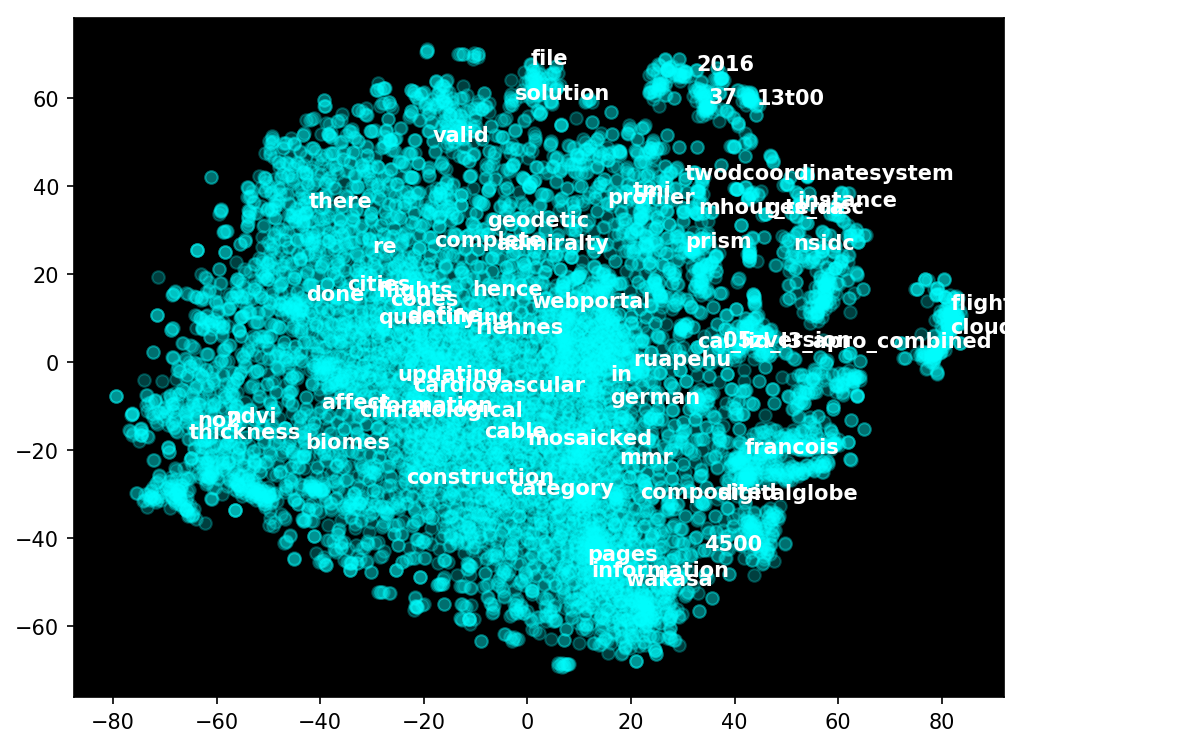

In [52]:
fig = plt.figure(figsize=(8, 6), dpi=150)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'], c='cyan', alpha=0.25)
ax.set_facecolor('black')

#idx = 6
idx = 2

for word, pos in df.iterrows():
    #idx += 1
    idx += 1
    if idx % 160 != 0:
        continue
    
    ax.annotate(word, pos, color='white', fontweight='bold')

plt.show()

In [53]:
fig.savefig(PREFIX + 'tSNE')